In [1]:
import os
import skimage.data
import matplotlib
import matplotlib.pyplot as plt
import skimage.transform
import numpy as np
import csv
import random

from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Input, Dropout
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.models import model_from_json

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
def load_data(data_dir):
    directories = [d for d in os.listdir(data_dir)
                  if os.path.isdir(os.path.join(data_dir, d))]
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f)
                      for f in os.listdir(label_dir)]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

def display_images_and_labels(images, labels):
    """Display the first image of each label."""
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 10
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 12 bytes but only got 0. Skipping tag 8624
  " Skipping tag %s" % (size, len(data), tag))
C:\ProgramData\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 40896
  " Skipping tag %s" % (size, len(data), tag))
C:\ProgramData\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 32756
  " Skipping tag %s" % (size, len(data), tag))
C:\ProgramData\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 16 bytes but only got 0. Skipping tag 34568
  " Skipping tag %s" % (size, len(data), tag))
C:\ProgramData\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Ex

C:\ProgramData\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 19660800 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
C:\ProgramData\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2284257280 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
C:\ProgramData\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 19599982592 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
C:\ProgramData\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2450128896 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
C:\ProgramData\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corr

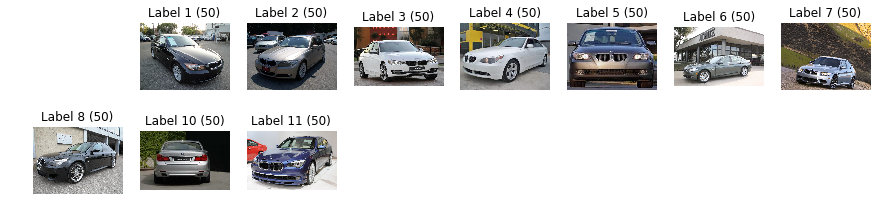

In [3]:
image_dir = 'E:\BMW_Dataset'
train_images, train_labels = load_data(image_dir)
display_images_and_labels(train_images, train_labels)

In [4]:
images64 = [skimage.transform.resize(image, (64,64)) for image in train_images]
np.shape(images64)

(500, 64, 64, 3)

In [ ]:
def augmentation()

In [5]:
y = np.array(train_labels)
x_train = np.array(images64)
num_categories = 43
y_train = to_categorical(y, num_categories)

X_train,X_Test,Y_train,Y_test = train_test_split(x_train,y_train,test_size=0.2)

X_train = X_train.reshape(-1,64, 64, 3)   #Reshape for CNN -  should work!!
X_Test = X_Test.reshape(-1,64, 64, 3)

In [7]:
inputs = Input(shape=(64,64,3))

x = Convolution2D(32, 4,4, border_mode='same', activation='relu')(inputs)
x = Convolution2D(32, 4,4, border_mode='same', activation='relu')(x)
x = Convolution2D(32, 4,4, border_mode='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.25)(x)

# one more block
x = Convolution2D(64, 4, 4, border_mode='same', activation='relu')(x)
x = Convolution2D(64, 4, 4, border_mode='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)

# fully connected, 256 nodes
x = Dense(256, activation='relu')(x)

x = Dropout(0.50)(x)

# softmax activation, 6 categories
predictions = Dense(43, activation='softmax')(x)

model = Model(input=inputs, output=predictions)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, Y_train, nb_epoch=15, batch_size=100)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (4, 4), activation="relu", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (4, 4), activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (4, 4), activation="relu", padding="same")`
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Upd

Epoch 1/15
409/409 [==============================] - 6s 15ms/step - loss: 4.5929 - acc: 0.0562
Epoch 2/15
409/409 [==============================] - 1s 2ms/step - loss: 2.8239 - acc: 0.1198
Epoch 3/15
409/409 [==============================] - 1s 2ms/step - loss: 2.6480 - acc: 0.0880
Epoch 4/15
409/409 [==============================] - 1s 2ms/step - loss: 2.5876 - acc: 0.1100
Epoch 5/15
409/409 [==============================] - 1s 2ms/step - loss: 2.6093 - acc: 0.0905
Epoch 6/15
409/409 [==============================] - 1s 2ms/step - loss: 2.5669 - acc: 0.0954
Epoch 7/15
409/409 [==============================] - 1s 2ms/step - loss: 2.5175 - acc: 0.1149
Epoch 8/15
409/409 [==============================] - 1s 2ms/step - loss: 2.5205 - acc: 0.1125
Epoch 9/15
409/409 [==============================] - 1s 2ms/step - loss: 2.4760 - acc: 0.1100
Epoch 10/15
409/409 [==============================] - 1s 2ms/step - loss: 2.4733 - acc: 0.0856
Epoch 11/15
409/409 [===========================